 # Acerca de pokebolas:

a) Ejecutando la funcion 100 veces, para cada Pokemon en condiciones ideales (HP:100%, LVL 100) ¿Cual es la probabilidad de captura promedio para cada pokebola?

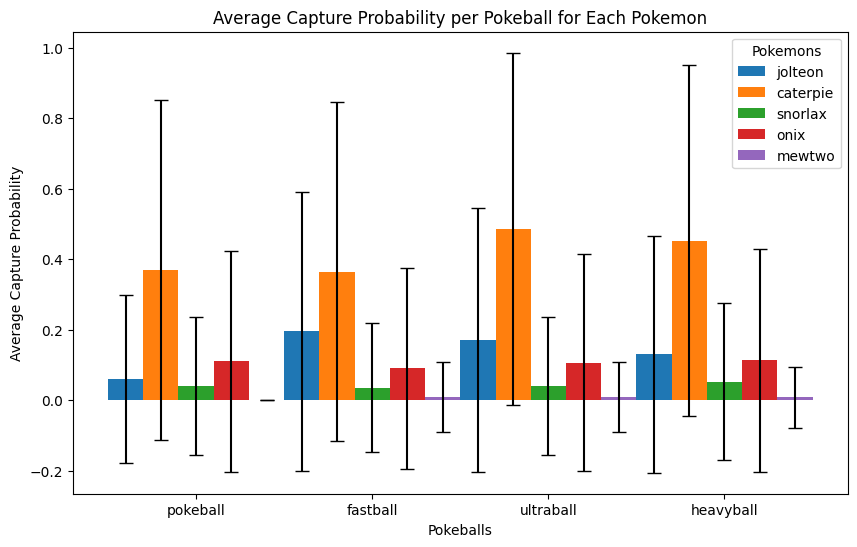

In [12]:
from src.catching import attempt_catch
from src.pokemon import PokemonFactory, StatusEffect
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
factory = PokemonFactory("../pokemon.json")
pokemons = ["jolteon","caterpie","snorlax","onix","mewtwo"]
pokeballs = ["pokeball", "fastball", "ultraball", "heavyball"]
data = {
    "pokeballs": pokeballs    
}
std_devs_data = {}
for pokemon_name in pokemons:
    means=[]
    std_devs=[]
    pokeball_attemps = []
    hp = 1
    lvl = 100
    for ball in pokeballs:
        pokemon = factory.create(pokemon_name, lvl, StatusEffect.NONE, hp)
        for _ in range(100):
            attempt,rate = attempt_catch(pokemon, ball)
            pokeball_attemps.append(attempt)  
        mean = np.mean(pokeball_attemps)
        std_dev = np.std(pokeball_attemps)
        means.append(mean)
        std_devs.append(std_dev)
    data[pokemon_name] = means  
    std_devs_data[pokemon_name] = std_devs
# Convert data to DataFrame
df = pd.DataFrame(data)
std_devs_df = pd.DataFrame(std_devs_data)

# Plotting grouped barplot with error bars
bar_width = 0.2
index = np.arange(len(df['pokeballs']))

plt.figure(figsize=(10, 6))

for i, pokemon_name in enumerate(pokemons):
    plt.bar(index + i * bar_width, df[pokemon_name], bar_width, 
            yerr=std_devs_df[pokemon_name], capsize=5, label=pokemon_name)

# Add labels, title, and legend
plt.xlabel('Pokeballs')
plt.ylabel('Average Capture Probability')
plt.title('Average Capture Probability per Pokeball for Each Pokemon')
plt.xticks(index + bar_width * (len(pokemons) - 1) / 2, df['pokeballs'])
plt.legend(title="Pokemons")

# Display the plot
plt.show()

b) ¿Es cierto que algunas pokebolas son mas o menos efectivas dependiendo de propiedades intrınsecas de cada Pokemon? Justificar.